# BeautifulSoup with Politico

In [1]:
from bs4 import BeautifulSoup
import requests

In [2]:
polrequest = requests.get('http://www.politico.com/')

In [3]:
# checking for a 200 response
polrequest

<Response [200]>

In [4]:
# creating a beautifulsoup object
politico_soup = BeautifulSoup(polrequest.content)

D:\Anaconda2_40\lib\site-packages\bs4\__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


In [5]:
stories = []
for link in politico_soup.findAll('a'):
    try:
        if 'www.politico.com/story/' in link.attrs['href']:
            stories.append(link.attrs['href'])
        
    except KeyError:
        continue

In [6]:
# now send http requests to get these
set(stories)

{'http://www.politico.com/story/2016/06/2016-nerdcast-did-trump-blow-it-on-orlando-224468',
 'http://www.politico.com/story/2016/06/apple-wont-aid-gop-convention-over-trump-224513',
 'http://www.politico.com/story/2016/06/bernie-sanders-convention-slot-enticement-224490',
 'http://www.politico.com/story/2016/06/charles-koch-money-senate-gop-224499',
 'http://www.politico.com/story/2016/06/chelsea-clinton-son-aidan-224512',
 'http://www.politico.com/story/2016/06/condoleezza-rice-donald-trump-vice-president-224509',
 'http://www.politico.com/story/2016/06/cruz-strategist-trump-has-a-math-problem-224294',
 'http://www.politico.com/story/2016/06/donald-trump-bernie-sanders-hillary-clinton-indictment-224516',
 'http://www.politico.com/story/2016/06/donald-trump-cash-never-trump-224511',
 'http://www.politico.com/story/2016/06/donald-trump-convention-delegates-media-hoax-224515',
 'http://www.politico.com/story/2016/06/donald-trump-gop-support-224522',
 'http://www.politico.com/story/2016/0

In [7]:
def get_politico_story(html):
    result = ""
    soup = BeautifulSoup(html)
    story_text = soup.find('div', class_='story-text')
    if story_text is None:
        raise ValueError('html did not contain a story.')
    paragraphs = story_text.findAll('p', class_=None)
    for paragraph in paragraphs:
        result += paragraph.getText() + '\n\n'
    return result

In [8]:
newstory = requests.get(stories[0]).content
basetext= get_politico_story(newstory)
print basetext


                "We really have to look at profiling. We have to look at it seriously,” Donald Trump said. | Getty

Donald Trump said in an interview Sunday he hates “the concept of profiling,” but at the same time is open to increasing profiling of American Muslims.

In a discussion that mentioned the surveillance of American mosques and response to recent terrorist attacks, "Face the Nation" host John Dickerson asked Trump if he was open to having law enforcement officials single out Muslims in America.

“I think profiling is something that we’re going to have to start thinking about as a country,” Trump said in an interview that aired Sunday on CBS. 

Trump said it’s a concept that must be looked at “seriously.” He mentioned Israel and “others” as countries that “successfully” profile.

"We really have to look at profiling. We have to look at it seriously,” he said. “And other countries do it. And it’s not the worst thing to do. I hate the concept of profiling, but we have to use c

In [15]:
test1 =requests.get(stories[0])

In [16]:
test1

<Response [200]>

In [17]:
souptest1 = BeautifulSoup(test1.content)

In [18]:
len(souptest1.findAll('div', class_='story-text'))

1

In [19]:
type(souptest1.find('div', class_='nonexistent class'))

NoneType

### Grab text from all the front page articles

In [17]:
def get_all_politico_text(urlarray):
    hugetextfile = ""
    for item in urlarray:
        request = requests.get(item)
        textholder = request.content
        textholder = get_politico_story(textholder)
        hugetextfile = hugetextfile + " " + textholder
    return hugetextfile

In [19]:
politicotextdump = get_all_politico_text(stories)

In [22]:
len(politicotextdump)

470211

In [24]:
words = politicotextdump.split(" ")
print words[0:50]

[u'', u'\n', u'', u'', u'', u'', u'', u'', u'', u'', u'', u'', u'', u'', u'', u'', u'', u'"The', u'American', u'people', u'stand', u'strong', u'with', u'the', u'people', u'of', u'Israel,', u'who', u'have', u'suffered', u'far', u'too', u'long', u'from', u'terrorism.', u'Israel\u2019s', u'security', u'is', u'a', u'matter', u'of', u'paramount', u'importance', u'to', u'me', u'and', u'the', u'American', u'people,"', u'Donald']


In [48]:
from collections import Counter
counts = Counter(words).most_common(len(words))
#counts2 = counts.copy()
countsunzipped = zip(*counts)
#print countsunzipped[1]

TypeError: cannot perform reduce with flexible type

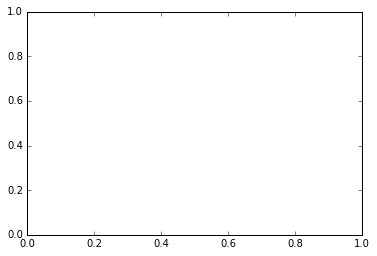

In [53]:
#pylab inline
import pylab as plt

fig = plt.figure()

x = countsunzipped[0]
y = countsunzipped[1]
n, bins, patches = plt.hist([x, y])
plt.show()


# Playing with daily forex data

In [14]:
import pandas as pd

In [16]:
fred = pd.read_csv('euroFREDcsv.csv', usecols=[0,1])
fred

,Unnamed: 0,DEXUSEU
0,1999-01-04,1.1812
1,1999-01-05,1.1760
2,1999-01-06,1.1636
3,1999-01-07,1.1672
4,1999-01-08,1.1554
5,1999-01-11,1.1534
6,1999-01-12,1.1548
7,1999-01-13,1.1698
8,1999-01-14,1.1689
9,1999-01-15,1.1591


In [43]:
pwd

u'/Users/jeffcoggshall/Dropbox/Prog/Py16/python-seminar/DataFiles_and_Notebooks/03_Numpy_Scipy_Stats'